# Diabetes Classification

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

## Read Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Number of time pregnance
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPreasure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age of this person in years
- Outcome: 1: Yes 0: No

In [3]:
# initial information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# initial statistic about data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# checking the null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No null data or missing value

In [6]:
# checking duplicate data
df.duplicated().sum()

0

No duplicated data

## Data Preprocessing

In [7]:
# check Outcome column
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

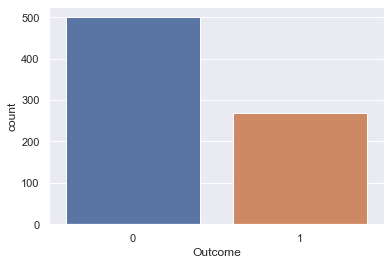

In [8]:
sns.countplot(df['Outcome'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A9FDC73AF0>,
      dtype=object)

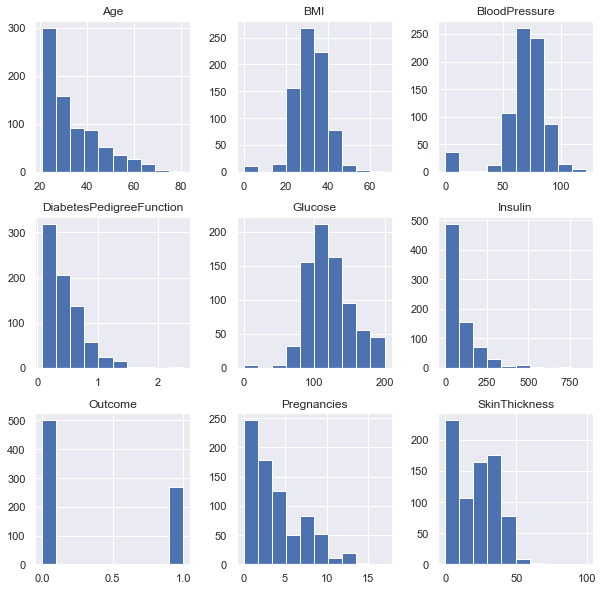

In [9]:
df.hist(figsize=(10,10))

### Imputation of Multiple Columns that have 0 as Value 

In [10]:
df.columns[1:8]

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
print('Glucose: ', df[df['Glucose'] == 0]['Glucose'].count())
print('BloodPressure: ', df[df['BloodPressure'] == 0]['BloodPressure'].count())
print('SkinThickness: ', df[df['SkinThickness'] == 0]['SkinThickness'].count())
print('Insulin: ', df[df['Insulin'] == 0]['Insulin'].count())
print('BMI: ', df[df['BMI'] == 0]['BMI'].count())

Glucose:  5
BloodPressure:  35
SkinThickness:  227
Insulin:  374
BMI:  11


We see that in this column there are some data which is funny or weird if it has value as 0. So we change it with mean by imputation technique.

In [12]:
# change 0 as Nan(empty)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Now that the values of these columns are empty, we can fill them in with the mean of the column using the imputation technique using the Outcome class as the benchmark.

In [14]:
df.groupby('Outcome')['Glucose'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,497.0,110.643863,24.776906,44.0,93.0,107.0,125.0,197.0
1,266.0,142.319549,29.599199,78.0,119.0,140.0,167.0,199.0


In [15]:
df.groupby('Outcome')['BloodPressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,481.0,70.877339,12.161223,24.0,62.0,70.0,78.0,122.0
1,252.0,75.321429,12.299866,30.0,68.0,74.5,84.0,114.0


In [16]:
df.groupby('Outcome')['SkinThickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,361.0,27.235457,10.026491,7.0,19.0,27.0,33.0,60.0
1,180.0,33.000000,10.327595,7.0,27.0,32.0,39.0,99.0


In [17]:
df.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [18]:
df.groupby('Outcome')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,491.0,30.859674,6.560737,18.2,25.6,30.1,35.300,57.3
1,266.0,35.406767,6.614982,22.9,30.9,34.3,38.925,67.1


In [19]:
# imputation function for glucose
def impute_glucose(cols):
    Glucose = cols[0]
    Outcome = cols[1]
    
    if pd.isnull(Glucose):

        if Outcome == 0:
            return 111

        else:
            return 142
    else:
        return Glucose

In [20]:
# imputation function for bloodpreassure column
def impute_bloodpreasure(cols):
    bloodpreasure = [0]
    outcome = [1]
    
    if pd.isnull(bloodpreasure):
        if outcome == 0:
            return 71
        else:
            return 75
    else:
        return bloodpreasure

In [21]:
# imputation function for skinthickness column
def impute_skinthickness(cols):
    skinthickness = [0]
    outcome = [1]
    
    if pd.isnull(skinthickness):
        if outcome == 0:
            return 27
        else:
            return 33
    else:
        return skinthickness

In [22]:
# imputation function for insulin column
def impute_insulin(cols):
    insulin = [0]
    outcome = [1]
    
    if pd.isnull(insulin):
        if outcome == 0:
            return 130
        else:
            return 207
    else:
        return insulin

In [23]:
# imputation function for bmi column
def impute_bmi(cols):
    bmi = [0]
    outcome = [1]
    
    if pd.isnull(bmi):
        if outcome == 0:
            return 31
        else:
            return 35
    else:
        return bmi

In [24]:
# applying imputation 
df['Glucose'] = df[['Glucose', 'Outcome']].apply(impute_glucose, axis=1)
df['BloodPressure'] = df[['BloodPressure', 'Outcome']].apply(impute_glucose, axis=1)
df['SkinThickness'] = df[['SkinThickness', 'Outcome']].apply(impute_glucose, axis=1)
df['Insulin'] = df[['Insulin', 'Outcome']].apply(impute_glucose, axis=1)
df['BMI'] = df[['BMI', 'Outcome']].apply(impute_glucose, axis=1)

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now we already fill the nan value

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,142.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,111.0,26.6,0.351,31,0
2,8,183.0,64.0,142.0,142.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.697917,30.460951,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,74.809896,16.687333,24.000,64.00000,73.0000,82.00000,142.00
SkinThickness,768.0,56.897135,44.515337,7.000,25.00000,35.0000,111.00000,142.00
Insulin,768.0,139.424479,87.246370,14.000,111.00000,111.0000,142.00000,846.00
BMI,768.0,33.663151,12.226534,18.200,27.50000,32.4000,36.82500,142.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Checking Outliers 

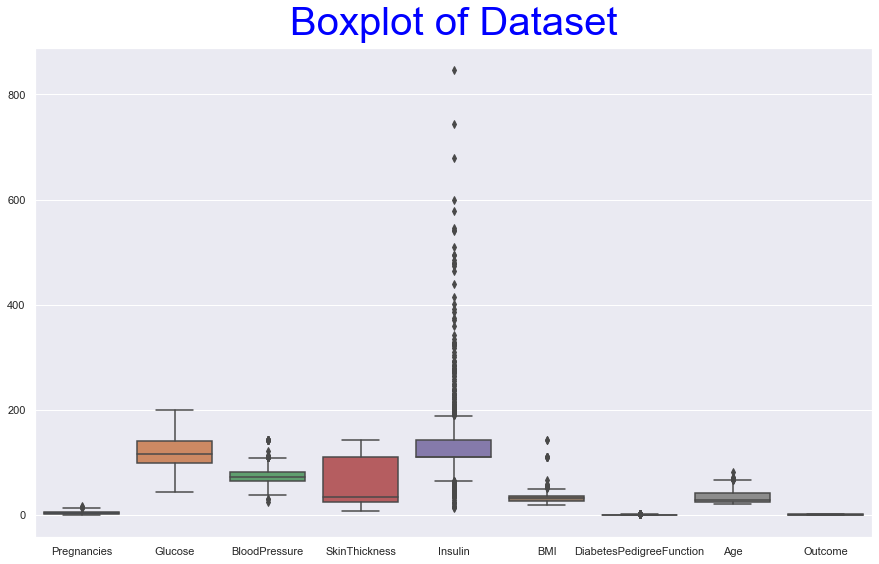

In [28]:
# checking outliers
plt.figure(figsize=(15,9))
plt.title('Boxplot of Dataset', fontsize=40, color='blue', pad=13, loc='center')
sns.boxplot(data=df)
plt.show()

We can see that there are multiple outliers across multiple columns, and we need to delete them

In [29]:
# remove outliers using Interquartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     41.2500
BloodPressure               18.0000
SkinThickness               86.0000
Insulin                     31.0000
BMI                          9.3250
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [30]:
# clearing the outliers
df_filtered = df.loc[~((df < (Q1 - 1.5 * IQR)).any(axis=1)|(df > (Q3 + 1.5 * IQR)).any(axis=1))].dropna()
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,142.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,111.0,26.6,0.351,31,0
2,8,183.0,64.0,142.0,142.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,116.0,74.0,111.0,111.0,25.6,0.201,30,0


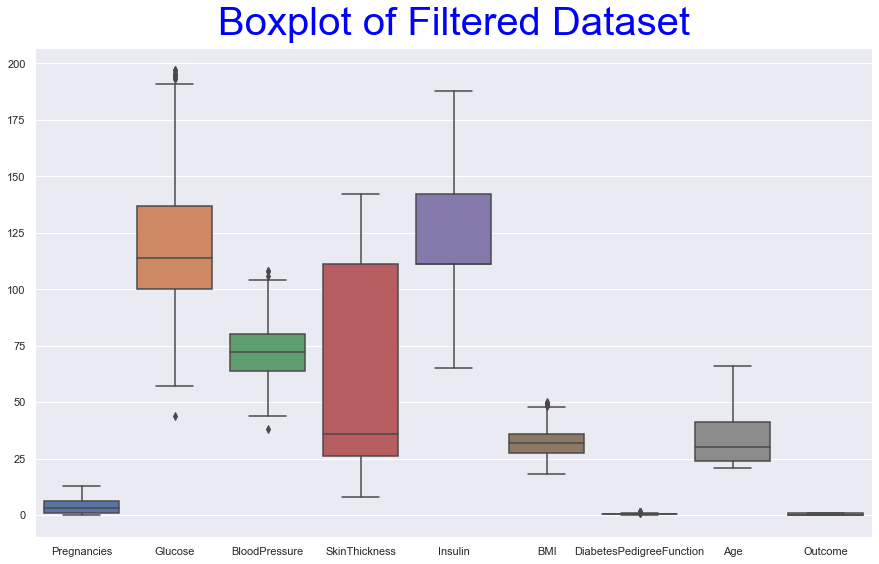

In [31]:
plt.figure(figsize=(15,9))
plt.title('Boxplot of Filtered Dataset', fontsize=40, color='blue', pad=13, loc='center')
sns.boxplot(data=df_filtered)
plt.show()

### Data Normalization

In [32]:
X = df_filtered.drop('Outcome', axis=1)
y = df_filtered['Outcome']

In [33]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,142.0,33.6,0.627,50
1,1,85.0,66.0,29.0,111.0,26.6,0.351,31
2,8,183.0,64.0,142.0,142.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5,116.0,74.0,111.0,111.0,25.6,0.201,30


In [34]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

#### Using Min Max Scaler 

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(X)

MinMaxScaler()

In [38]:
X = scaler.transform(X)

In [39]:
X = pd.DataFrame(X)
X.columns=[df_filtered.columns[:8]]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.679739,0.485714,0.201493,0.626016,0.484277,0.493261,0.644444
1,0.076923,0.267974,0.400000,0.156716,0.373984,0.264151,0.245283,0.222222
2,0.615385,0.908497,0.371429,1.000000,0.626016,0.160377,0.533693,0.244444
3,0.076923,0.294118,0.400000,0.111940,0.235772,0.311321,0.079964,0.000000
4,0.384615,0.470588,0.514286,0.768657,0.373984,0.232704,0.110512,0.200000
...,...,...,...,...,...,...,...,...
516,0.769231,0.372549,0.542857,0.298507,0.934959,0.462264,0.083558,0.933333
517,0.153846,0.509804,0.457143,0.141791,0.373984,0.584906,0.235400,0.133333
518,0.384615,0.503268,0.485714,0.111940,0.382114,0.251572,0.150045,0.200000
519,0.076923,0.535948,0.314286,1.000000,0.626016,0.374214,0.243486,0.577778


## Train & Test Data 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training Model

### KNN 

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

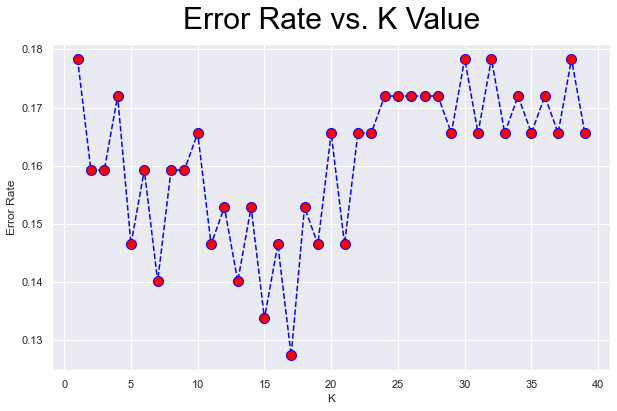

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=30, color='black', pad=15, loc='center')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

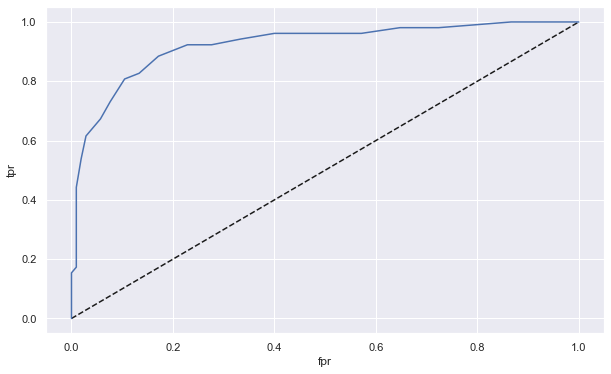

In [46]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [47]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9221611721611721

In [48]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8867561683599419
Best Parameters: {'n_neighbors': 7}


### Decision Tree 

In [49]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.001)
dtc.fit(X_train, y_train)
dtc_prediction = dtc.predict(X_test)

In [50]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
print(metrics.confusion_matrix(y_test, dtc_prediction))
print(metrics.classification_report(y_test, dtc_prediction))

[[94 11]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       105
           1       0.80      0.83      0.81        52

    accuracy                           0.87       157
   macro avg       0.85      0.86      0.86       157
weighted avg       0.87      0.87      0.87       157



In [51]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, dtc_prediction)
prec_dtc = metrics.precision_score(y_test, dtc_prediction)
rec_dtc = metrics.recall_score(y_test, dtc_prediction)
f1_dtc = metrics.f1_score(y_test, dtc_prediction)
kappa_dtc = metrics.cohen_kappa_score(y_test, dtc_prediction)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.8726114649681529
Precision: 0.7962962962962963
Recall: 0.8269230769230769
F1 Score: 0.8113207547169811
Cohens Kappa Score: 0.715218574278977


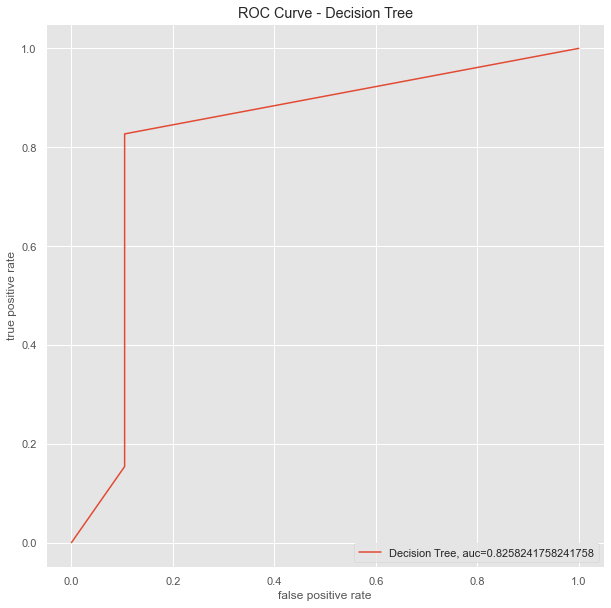

In [52]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
dtc_prediction_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  dtc_prediction_proba)
aucdtc = metrics.roc_auc_score(y_test, dtc_prediction_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### Random Forest 

In [53]:
# Import Module
from sklearn import ensemble

# Modeling Random Forest
rdf = ensemble.RandomForestClassifier(n_estimators=600)
rdf.fit(X_train, y_train)

# Predict to Test Data 
rdf_prediction = rdf.predict(X_test)

In [54]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
print(metrics.confusion_matrix(y_test, rdf_prediction))
print(metrics.classification_report(y_test, rdf_prediction))

[[100   5]
 [  9  43]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       105
           1       0.90      0.83      0.86        52

    accuracy                           0.91       157
   macro avg       0.91      0.89      0.90       157
weighted avg       0.91      0.91      0.91       157



In [55]:
# Show the Accuracy, Precision, Recall
acc_rdf = metrics.accuracy_score(y_test, rdf_prediction)
prec_rdf = metrics.precision_score(y_test, rdf_prediction)
rec_rdf = metrics.recall_score(y_test, rdf_prediction)
f1_rdf = metrics.f1_score(y_test, rdf_prediction)
kappa_rdf = metrics.cohen_kappa_score(y_test, rdf_prediction)

print("Accuracy:", acc_rdf)
print("Precision:", prec_rdf)
print("Recall:", rec_rdf)
print("F1 Score:", f1_rdf)
print("Cohens Kappa Score:", kappa_rdf)

Accuracy: 0.910828025477707
Precision: 0.8958333333333334
Recall: 0.8269230769230769
F1 Score: 0.86
Cohens Kappa Score: 0.7947329099738514


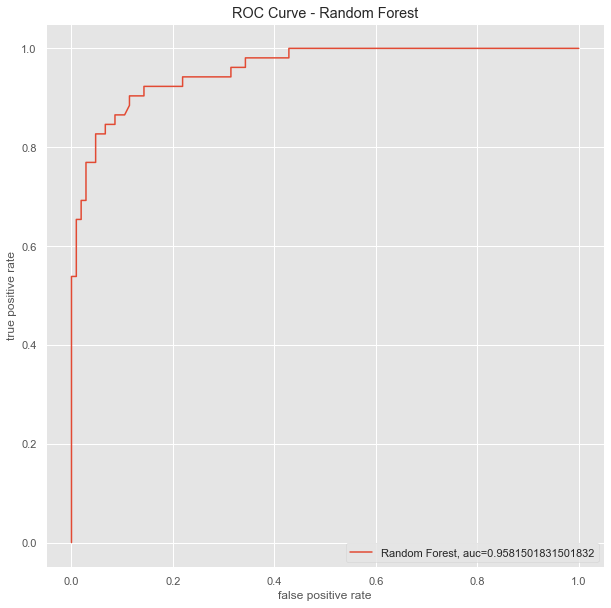

In [56]:
# ROC Curve
rdf_prediction_proba = rdf.predict_proba(X_test)[::,1]
fprrdf, tprrdf, _ = metrics.roc_curve(y_test,  rdf_prediction_proba)
aucrdf = metrics.roc_auc_score(y_test, rdf_prediction_proba)
plt.plot(fprrdf,tprrdf,label="Random Forest, auc="+str(aucrdf))
plt.title('ROC Curve - Random Forest')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

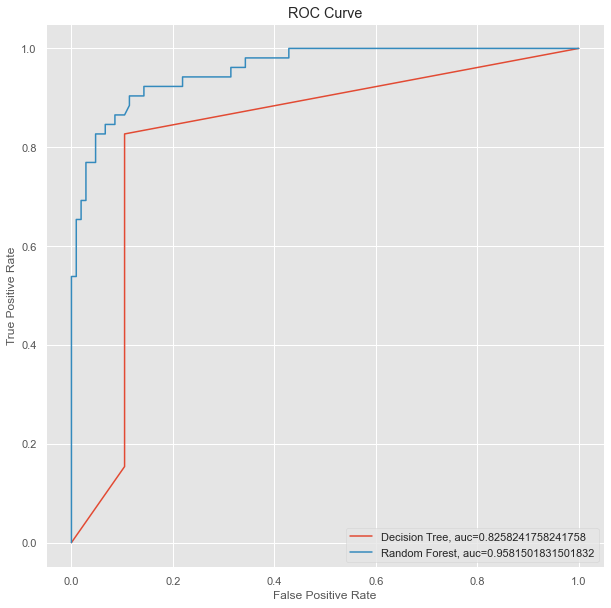

In [57]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprrdf,tprrdf,label="Random Forest, auc="+str(aucrdf))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Random Forest model is the best model to do classification for this dataset with auc in roc curve = 95